# <font color='blue'>Decomposição em Valores Singulares (SVD) - Aplicações</font>

### <font color='blue'> Solução dos Exercícios</font>
**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Exercício 1)
Considere a base de dados `bow_3classes.csv` que contém a frequência de palavras em um conjutno de documentos, ou seja, cada entrada $ij$ da matriz contém o número de vezes que a palavra $j$ aparece no documento $i$.

A identificação dos documentos, listada na primeira coluna do arquivo, é formada por duas letras e um número, onde as duas letras identificam a qual grupo o documento pertence. 
Por exemplo, o documento `ch22` pertence a classe de assuntos ligados à "cristianismo" e o documento `gr15` a classe de documentos de assuntos gerais.

A função <font color='blue'>read_file()</font> abaixo lê o arquivo `bow_3classes.csv` e retorna uma matriz _palavra$\times$documentos_, uma lista de palavras que correspondem às linhas da matriz e uma lista com os nomes dos documentos que correspondem às colunas da matriz. Assim, cada linha da matriz retornada corresponde a frequência de ocorrência de uma palavra em cada documento e as colunas correspondem aos documentos.

In [ ]:
def read_file():
    df = pd.read_csv('bow_3classes.csv',index_col=0)
    X = df.values
    X = StandardScaler().fit_transform(X)
    X = X.T
    docs = df.index.values
    words = df.columns.values
    return(X,docs,words)

#### Exercício 1.1)
Escreva um cógido para extrair os tópicos associados à coleção de documentos utilizando a representação latente fornecida pelo SVD truncado. Analise as classes dos documentos para encontar o número de tópicos que devem ser extraídos.

In [28]:
X,d,w = read_file()

classes = list(set([a[:2] for a in d]))
print('Classes de documentos:',classes)

Classes de documentos: ['gr', 'au', 'ch']


In [ ]:
# vamos extrair 3 tópicos, pois os documentos pertencem a apenas 3 classes distintas

Tsvd = TruncatedSVD(n_components=3)  
U = Tsvd.fit_transform(X)
Sigma = Tsvd.explained_variance_ratio_
Vt = Tsvd.components_

#### Exercício 1.2)
Clusterize os documentos no espaço latente em um número de clusters igual ao número de tópicos extraídos.

In [29]:
# identificando documentos dentro do mesmo tópico clusterizando as colunas de Vt em 3 grupos
kmeans = KMeans(n_clusters=3, random_state=1).fit(Vt.T)
docs_semelhantes = kmeans.labels_

#### Exercício 1.3)
Projete a representação latente dos documentos em um espaço bidimensional gerado pelas duas direções principais (dois tópicos principais). Utilize cores para indicar a qual grupo cada documento pertece.

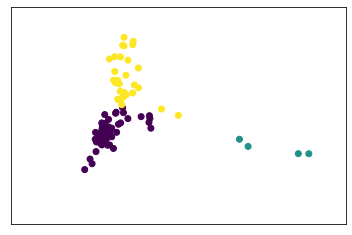

In [44]:
# projetando os docs_semelhantes nas duas direções principais
prj = np.dot(np.diag(Sigma[:2]),Vt[:2:])

plt.xticks([])
plt.yticks([])
plt.xlim(-0.01,0.02)
plt.ylim(-0.01,0.01)
plt.scatter(prj[0,:],prj[1,:],c=docs_semelhantes)

#### Exercício 1.4)
 Compare visualmente os grupos obtidos com o método de agrupamento com as classes reais dos documentos. Em outras palavras, utilize as classes informadas nos nomes dos documentos para colorir os pontos projetados nas duas direções principais.

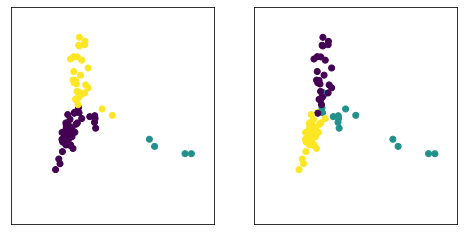

In [45]:
# projetando os docs_semelhantes nas duas direções principais
prj = np.dot(np.diag(Sigma[:2]),Vt[:2:])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlim(-0.01,0.02)
ax1.set_ylim(-0.01,0.01)
ax1.scatter(prj[0,:],prj[1,:],c=docs_semelhantes)

# comparando os clusters com os rótulos das classes originais

# transformando as classes dos documentos em inteiros 0,1 e 2 para poder colorir o plot
cldic = {classes[i]:i for i in range(len(classes))}
classes_int = [cldic[a[:2]] for a in d]

ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlim(-0.01,0.02)
ax2.set_ylim(-0.01,0.01)
ax2.scatter(prj[0,:],prj[1,:],c=classes_int)

### Exercício 2)
A função <font color='blue'>rating_matrix()</font>, descrita abaixo, utiliza informações de avaliações de consumidores com relação a produtos e constroi uma matriz onde as linhas correspondem à consumidores e as linha aos produtos avaliados. A matriz gerada é retornada pela função. 

In [72]:
def rating_matrix():
    uir = np.loadtxt('ratings.txt')
    users = np.unique(uir[:,0].astype(int))
    items = np.unique(uir[:,1].astype(int))
    R = np.zeros((users.shape[0],items.shape[0]))
    for i in range(uir.shape[0]):
        R[uir[i,0].astype(int)-1,uir[i,1].astype(int)-1] = uir[i,2]
        
    return(R)

#### Exercício 2.1)
Encontre os espaços latentes de consumidores e produtos atravéz da decomposição SVD.

In [79]:
R = rating_matrix()

k = 10

Rsvd = TruncatedSVD(n_components=k)  
Uk = Tsvd.fit_transform(R)
Sk = Tsvd.explained_variance_ratio_
Vkt = Tsvd.components_

# calculando as representacoes latentes de consumidores C e produtos P 
k = 3
C = np.dot(Uk[:,:k],np.diag(np.sqrt(Sk[:k])))
P = np.dot(np.diag(np.sqrt(Sk[:k])),Vkt[:k,:])

#### Exercício 2.2)
Encontre os 10 produtos mais relevantes para um consumidor escolhido de forma aleatória.

In [103]:
# encontrado os produtos mais relevantes para o cosumidor C[i]
i = int(np.random.randint(0,R.shape[0],1))  # escolhendo um consumidor aleatoriamente
rij = np.dot(C[i,:],P).ravel()   # relevancia dos produtos para o consumidor C[i]

sij = np.argsort(rij)[::-1]   # ordenando a relevancia dos produtos em ordem decrescente
print('Os 10 produtos mais importantes para o consumidor',i,'\n',sij[:10])

Os 10 produtos mais importantes para o consumidor 5 
 [  6  10   1  16 206   0 235  12   7   4]


#### Exercício 2.3)
Encontre os 3 produtos mais relevantes que o consumidor selecionado no exercício 2.2) ainda não tenha adquirido.

In [104]:
# encontrando os 3 produtos mais importantes ainda não adquiridos pelo consumidor C[i]
nao_aquiridos = np.where(R[i]==0)[0]

produtos_nao_adquiridos = [j for j in sij if j in nao_aquiridos]

# 3 produtos mais relevantes ainda nao adquiridos
print(produtos_nao_adquiridos[:3])

[10, 206, 0]


#### Exercícios 2.4)
Encontre os 10 consumidores mais parecidos com o consumidor selecionado no exercício 2.2) e verifique se eles adquiriram alguns dos 3 produtos mais relevantes não adquiridos pelo consumidor selecionado em 2.2).

In [105]:
# encontrando os 10 consumidores mais pareceidos com o consumidor C[i]
cij = np.dot(C[i,:]/np.linalg.norm(C[i,:]),C.T/np.linalg.norm(C.T,axis=0))
cmm = np.argsort(cij)[::-1].ravel()

# verificando se os 5 consumidores mais parecidos com C[i] avaliaram os 3 produtos mais 
# relevantes para C[i]
print('consumidor escolhido C[',i,']',R[i,produtos_nao_adquiridos[:3]])
print('os 10 consumidores mais parecidos são')
for j in range(1,11):
    print('consumidor escolhido C[',cmm[j],']',R[cmm[j],produtos_nao_adquiridos[:3]])


consumidor escolhido C[ 5 ] [0. 0. 0.]
os 10 consumidores mais parecidos são
consumidor escolhido C[ 741 ] [0. 4. 0.]
consumidor escolhido C[ 328 ] [0.  1.  0.5]
consumidor escolhido C[ 1271 ] [0. 2. 3.]
consumidor escolhido C[ 879 ] [0. 0. 3.]
consumidor escolhido C[ 1211 ] [3.  2.5 0. ]
consumidor escolhido C[ 959 ] [0. 3. 2.]
consumidor escolhido C[ 1144 ] [0.  3.5 0. ]
consumidor escolhido C[ 751 ] [3.5 3.  0. ]
consumidor escolhido C[ 86 ] [0. 2. 3.]
consumidor escolhido C[ 771 ] [0. 4. 3.]
